In [110]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import pandas as pd
%matplotlib inline

In [111]:
iris = datasets.load_iris()

In [112]:
df=pd.DataFrame(iris.data)
df['class']=iris.target

In [113]:
df.head()

,0,1,2,3,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [114]:
df.columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid','class']

In [115]:
df.dropna(how="all", inplace=True)

In [116]:
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [117]:
X = df.iloc[:,:-1].values
y = df.iloc[:,4].values


In [118]:
X.shape, y.shape

((150, 4), (150,))

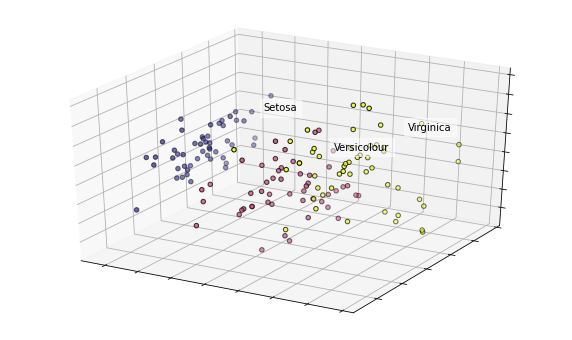

In [119]:
fig = plt.figure(1, figsize=(10, 6))
plt.clf() # clearing the current figure
ax = plt.axes(projection='3d')

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
y = np.choose(y, [2, 1, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.plasma_r,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

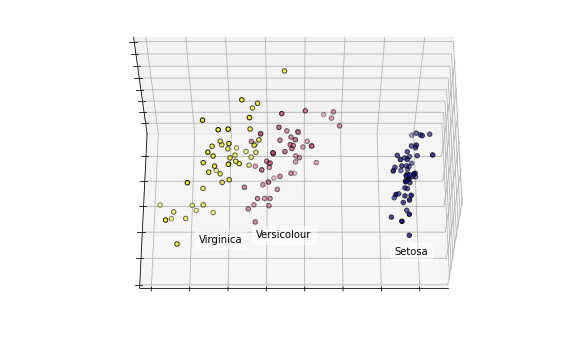

In [120]:
ax.view_init(60, 90)
fig